### Section 42
Think of a machine learning model as a black box that you feed input and gives back an output. Before we get comfortable and confident about the model's output, we must train our model. This is the only way for our model to make sense of the input model. The basic logic for training an algorithm involves four components
- Data
- Model
- Objective Function
- Optimization Algorithm

First, we must prepare a certain amount of data to train with. Second, we need a model. The simplest model we can train is a linear model. The linear model is just the tip of the iceberg. Third, is the objective function. The objective function estimates how accurate the models output is on average. We want to minimize the objective function. The fourth part is the optimization algorithm, it optimizes the different parameters in order to minimize the objective function. These are not four steps but four ingredients, because this process completely iterative. 

The machine learning process is a kind of a trial and error training. After thousands of trials and errors, the machine will eventually learn how to produce the proper output as expected by the user. Think of a self driving car. Self driving cars don't follow rules like don't hit curbs. They watch hours of videos of people driving and train themselves to drive. It's not about the rules but rather about the output. 

There are three major types of machine learning:
- supervised: we provide the model with inputs and corresponding required outputs
- unsupervised: we feed inputs but there are no target outputs
- reinforcement: we would train our model to act in an environment based on the reward it receives

Supervised learning is the focus of this course. It can be divided into two subtypes, classification and regression. We will create both classification and regression algorithms

Consider the variable x, we know that $f(x)$ is a linear function. The linear model is the basis for more complicated models. In the linear model universe, $f(x) = xw + b$ where $w$ is our weight and $b$ is our bias. The goal of the machine learning algorithm would be to find such values for w and b, so the output of $wx + b$ is as close to the observed values as possible. 

The linear model works with multiple inputs. Say for instance we are calculating real estate price, we could simply have size as a variable to calculate price, but we could also add a variable for proximity to the beach. In this scenario, our formula would look something like $y = x_1*w_1 + x_2*w_2 + b$. We can have multiple inputs in our linear models and this would improve our accuracy.

Say we wanted to not only predict price, but also how much rent we could charge. Our inputs would be unchanged but this time we have two outputs, so we can create two linear models. We have the same number of inputs, but we have k * m weights, where m is the ouputs and k is the inputs. Each model is determined solely by its weights and biases. In ML, we vary only the weights and the biases, but the logic of the model remains the same.

What is the objective function? The objective function is the mesure used to evaluate how well the model's outputs match the observed ouptputs. There are two types of objective functions, loss functions and reward functions. Usually, reward functions are used more in reinforcement learning. When dealing with supervised learning, you are most likely going to be using loss functions. 

The target is the desired value at which we are aiming, we want our output y to be as close to our target t. One common loss functions are the L2-norm in regression models. The lower the error between y and t, the the lower the loss. Norm comes from the fact it is the vector norm, or Euclidean distance of the outputs and the targets. Cross entropy is the common loss function for classification. It is defined as $L(y, t) = - \sum t_i * \ln{y}$. The lower the loss, the more accurate the model. There are also other loss functions. Any function that holds the basic property of higher for worse results, lower for better results can be a loss function.

The simplest optimization algorithm is the gradient descent. Imagine a function $f(x) = 5x^2 + 3x + 4$. Our goal is to find the minimum using the gradient descent methodology. First we find the first derivative $f'(x) = 10x + 3$. Then pick an arbitraty $x_0$ such as 4, then $x_{i + 1} = x_i - \eta * f'(x_i)$. $x_1 = 4 - \eta * [10*4 + 3] = 4 - \eta * 43$. $\eta$ is the learning rate. We choose the learning rate for each case. Using the update rule we can find $x_2, x_3,$ and so on. Generally, we want the learning rate to be: high enough so we can reach the closes minimum in a rational amount of time and low enough so we don't oscillate around the minimum. We can find the minimum by trial and error using gradient descent. Each trial is better than the previous one due to the update rule. We should stop updating once we've converged. 

Think back to the model: $wx + b = y$. A single observation $x_i*w + b = y_i$. We are interested in target $t_i$. Then we think of our loss function, $L(y, t) = \frac{\sum_i (y_i - t_i)^2}{2}$. To perform the gradient descent, our update rule is $x_{i + 1} = x_i - \eta * f'(x_i)$ converted to $w_{i + 1} = w_i - \eta * \nabla_w * L(y,t)$ and $b_{i + 1} = b_i - \eta * \nabla_b * L(y,t)$. It is basically the same but for the matrices w and b. 

In [19]:
# The course did not have a python example of gradient descent in this course so I found my own dataset 
# and implemented the gradient descent code found here: https://engmrk.com/gradient-descent/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com
# on my own found dataset on Kaggle

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('~/Desktop/Salary_Data.csv')

In [20]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Cost at 10 iteration =  1.0259787380427098e+28
Cost at 20 iteration =  1.1146726468958901e+48
Cost at 30 iteration =  1.2110339753319226e+68
Cost at 40 iteration =  1.3157255571780599e+88
Cost at 50 iteration =  1.429467526984158e+108
Cost at 60 iteration =  1.553042273561059e+128
Cost at 70 iteration =  1.6872998217429468e+148
Cost at 80 iteration =  1.833163679392823e+168
Cost at 90 iteration =  1.991637189870444e+188
W =  1.9583023419349652e+103 & b =  2.906038689577634e+102


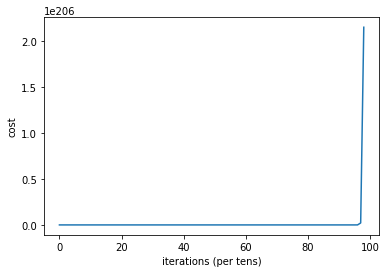

In [21]:
X = df['YearsExperience']
Y = df['Salary']

costs = []
#Step 1: Parameter initialization 
W = 0.45
b = 0.75

for i in range(1, 100):
    
#Step 2: Step 2: Calculate Cost
    Y_pred = np.multiply(W, X) + b
    Loss_error = 0.5 * (Y_pred - Y)**2
    cost = np.sum(Loss_error)/10
    
#Step 3: Calculate dW and db    
    db = np.sum((Y_pred - Y))
    dw = np.dot((Y_pred - Y), X)
    costs.append(cost)

#Step 4: Update parameters:
    W = W - 0.01*dw
    b = b - 0.01*db
    
    if i%10 == 0:
        print("Cost at", i,"iteration = ", cost)

#Step 5: Repeat from Step, implemented as a for loop with 1000 iterations

#Plot the cost against no. of iterations
print("W = ", W,"& b = ",  b)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

### Section 43 
Simple linear regression - minimal example

In [22]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# Generate random data
observations = 1000

# Two variables of our linear model
xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


In [24]:
# Create the targets we will aim at
# Our targets should be equal to 2x - 3z + 5 + noise

noise = np.random.uniform(-1, 1, (observations, 1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


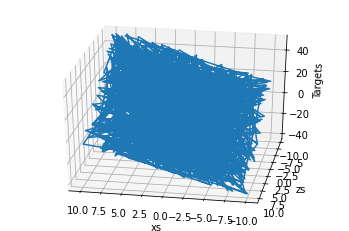

In [25]:
# Plot the training data
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')


ax.view_init(azim=100)

plt.show()
targets = targets.reshape(observations,1)

In [26]:
# Initialize variables
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size = (2,1))

biases = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(biases)

[[-0.03544033]
 [-0.02938404]]
[-0.00682997]


In [27]:
# Set a learning rate
learning_rate = 0.02

In [28]:
# Train the model
for i in range (100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    # Follow the L2-norm loss formula divided by 2
    # Division by a constant doesn't change the logic of the loss, as it is still lower for higher
    # accuracy
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Want to see the loss decrease after each iteration
    print(loss)
    
    # Update the weights and the biases following the gradient descent logic
    deltas_scaled = deltas / observations
    weights = weights - learning_rate *np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

240.39527608107986
35.27787908204492
13.989345554451653
11.371625195078858
10.707716766695714
10.267622027809695
9.866715234323756
9.484114552682362
9.116889225325979
8.76417071650047
8.425354954522223
8.099889983078036
7.787249201497752
7.486927231997589
7.198438673566559
6.921317259880902
6.655115097843349
6.399401942593622
6.153764501979791
5.9178057685602
5.691144377943763
5.473413992415615
5.264262708849818
5.063352489951752
4.870358617910942
4.68496916958128
4.506884512340404
4.335816819813452
4.171489606678446
4.0136372818014765
3.8620047189794415
3.7163468445965373
3.576428241528104
3.4420227686515936
3.3129131953497253
3.188890850415115
3.069755284788881
2.955313947588187
2.8453818748990636
2.7397813908315505
2.6383418203539857
2.540899213442315
2.447296080098585
2.3573811358103405
2.271009057039542
2.188040246345808
2.1083406067643655
2.0317813250740517
1.9582386636050833
1.8875937602500992
1.8197324363552465
1.754545012180831
1.6919261296332462
1.6317745819817142
1.573993150

In [29]:
# Print the weights and the biases
print(weights, biases)

[[ 2.00957927]
 [-3.0005469 ]] [4.35180855]


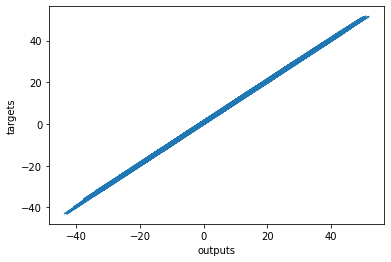

In [30]:
# Plot last outputs vs targets
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

#### Using the Salary dataset I found on my own:

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_csv('~/Desktop/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
inputs = df['YearsExperience']
print(inputs.shape)

targets = df['Salary']
print(targets.shape)

(30,)
(30,)


In [58]:
# Initialize variables
init_range = 0.1

weights = np.random.uniform(0, 10000, size = 1)

biases = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(biases)

[7025.81717744]
[-0.04038826]


In [59]:
# Set a learning rate
learning_rate = 0.02

In [64]:
observations = 30

# Train the model
for i in range (1000):
    outputs = inputs *  weights + biases
    deltas = outputs - targets
    
    # Follow the L2-norm loss formula divided by 2
    # Division by a constant doesn't change the logic of the loss, as it is still lower for higher
    # accuracy
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Want to see the loss decrease after each iteration
    print(loss)
    
    # Update the weights and the biases following the gradient descent logic
    deltas_scaled = deltas / observations
    weights = weights - learning_rate *np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

17888226.03431402
17869205.960454848
17850346.473958597
17831646.218978718
17813103.851116173
17794718.03732272
17776487.455805134
17758410.79593011
17740486.758130107
17722714.053809915
17705091.405253936
17687617.54553444
17670291.21842039
17653111.178287167
17636076.19002705
17619185.02896036
17602436.480747435
17585829.341301393
17569362.416701455
17553034.523107212
17536844.486673422
17520791.143465728
17504873.339376904
17489089.930043895
17473439.78076557
17457921.76642113
17442534.771389212
17427277.6894677
17412149.423794203
17397148.886767197
17382274.999967787
17367526.694082268
17352902.908825174
17338402.592863075
17324024.703738995
17309768.20779751
17295632.080110356
17281615.304402784
17267716.872980516
17253935.786657296
17240271.054683026
17226721.694672536
17213286.732535016
17199965.202403944
17186756.146567628
17173658.615400415
17160671.66729435
17147794.368591554
17135025.793517027
17122365.024112176
17109811.15016872
17097363.26916334
17085020.48619278
17072781.

15683850.204892509
15683441.77807181
15683036.799617648
15682635.24041528
15682237.071595836
15681842.264534151
15681450.79084673
15681062.622389743
15680677.73125699
15680296.089777866
15679917.670515401
15679542.446264245
15679170.390048811
15678801.475121181
15678435.674959358
15678072.963265201
15677713.31396266
15677356.701195799
15677003.099327011
15676652.482935147
15676304.826813703
15675960.105968956
15675618.29561824
15675279.37118811
15674943.308312627
15674610.082831528
15674279.670788566
15673952.048429769
15673627.192201694
15673305.078749763
15672985.68491661
15672668.987740347
15672354.96445299
15672043.592478752
15671734.849432496
15671428.713118067
15671125.161526673
15670824.172835404
15670525.72540558
15670229.797781195
15669936.368687434
15669645.417029066
15669356.921888998
15669070.862526745
15668787.218376903
15668505.969047729
15668227.094319662
15667950.574143805
15667676.388640579
15667404.518098217
15667134.942971434
15666867.6438799
15666602.601606961
15666

15636161.479921304
15636155.691210235
15636149.951373523
15636144.259998534
15636138.616676066
15636133.021000436
15636127.472569356
15636121.970983943
15636116.51584866
15636111.106771344
15636105.743363112
15636100.425238397
15636095.152014833
15636089.923313359
15636084.738758046
15636079.597976161
15636074.500598151
15636069.446257534
15636064.434590954
15636059.465238094
15636054.537841715
15636049.652047578
15636044.807504417
15636040.003863968
15636035.240780871
15636030.517912704
15636025.83491993
15636021.19146588
15636016.587216742
15636012.021841489
15636007.495011905
15636003.006402543
15635998.555690723
15635994.142556472
15635989.766682522
15635985.427754264
15635981.12545978
15635976.859489786
15635972.629537558
15635968.435299015
15635964.276472619
15635960.152759396
15635956.063862864
15635952.009489078
15635947.989346556


In [65]:
# Print the weights and the biases
print(weights, biases)

[9459.72830713] [25726.38981324]


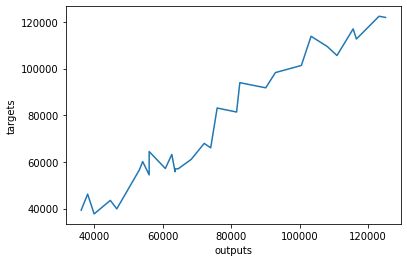

In [66]:
# Plot last outputs vs targets
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

### Section 49
Preprocessing refers to any manipulation of the dataset before running it through the model. This section will focus on data transformation. 

Motivation:
- Compatablility with the libraries you are using
- Orders of magnitude, bigger values will affect the model more
- Generalization: using the same model for different issues

Often we are not interested in an absolute value, but a relative value. For instance if you go to Apple stock price, you will see numbers in red and green which are relative metrics, as they are relative change of the stock price. The most common problem when working with numerical data is the difference in magnitudes of the data. We can fix this by using standardization, or feature scaling. Standardization is the process of transoforming data into a standard scale. A very common way to approach this process is to subtract the mean and divide by the standard deviation. Feature scaling allows our linear combinations treats all variables equally. Plus, we can make much more sense of the data. PCA is another preprocessing method which is a dimension reduction technique. Whitening is another technique that is performed after PCA which removes underlying correlations between datapoints. We cannot get to PCA and Whitening in this video.

When dealing with categorical data, you must be able to convert your categorical data into numbers. Imagine your shop has three products bread, yogurt, and muffins. You can just enumerate like (1, 2, 3), but this implies that there is some order to them. This is typically an issue. So instead, you must either use one hot encoding or binary encoding. 

Binary Encoding starts with bread -1 , yogurt - 2, and muffin - 3. Convert these numbers into binary: bread - 01, yogurt - 10, muffin - 11, Now, you can create a table of two variables where variable one contains the first number, so for instance in bread, '0', and then the second  variable  contains the second number so for instanc in bread , 1. However, if you did it this way, it would imply yogurt and bread are opposites and that's not necessarily true, so even binary encoding can prove to be troublesome.

In one hot encoding, you create a variable for each type of category such as a variable for bread, yogurt, and muffin each. Then, bread would be encoded as bread = 1, yogurt - 0, and muffin = 0. However, one hot encoding has one big problem, if you have 12,000 categories you wouldn't want to make 12,000 variables. Therefore you can just 

In [5]:
# For my own practice, I'll be using clickstream data from an online store 
import pandas as pd

df = pd.read_csv('~/Desktop/e-shop data and description/e-shop clothing 2008.csv', delimiter=";")

In [6]:
df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [8]:
# One hot encoding - to convert categorical data to continuous
df['page 2 (clothing model)'] = df['page 2 (clothing model)'].astype(str)
df = pd.get_dummies(df)
df.head(5)

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,...,page 2 (clothing model)_P75,page 2 (clothing model)_P76,page 2 (clothing model)_P77,page 2 (clothing model)_P78,page 2 (clothing model)_P79,page 2 (clothing model)_P8,page 2 (clothing model)_P80,page 2 (clothing model)_P81,page 2 (clothing model)_P82,page 2 (clothing model)_P9
0,2008,4,1,1,29,1,1,1,5,1,...,0,0,0,0,0,0,0,0,0,0
1,2008,4,1,2,29,1,1,1,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2008,4,1,3,29,1,2,10,2,1,...,0,0,0,0,0,0,0,0,0,0
3,2008,4,1,4,29,1,2,6,6,2,...,0,0,0,0,0,0,0,0,0,0
4,2008,4,1,5,29,1,2,4,3,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardizing the price 
from sklearn.preprocessing import StandardScaler
continuous_variables = ['price', 'price 2']
scaler = StandardScaler()
df[continuous_variables]=scaler.fit_transform(df[continuous_variables])
df['price']

0        -1.259355
1        -0.860888
2         0.653286
3        -0.462421
4         0.653286
            ...   
165469    1.848687
165470    1.450220
165471   -0.063954
165472   -0.063954
165473    1.051753
Name: price, Length: 165474, dtype: float64

In [12]:
df['price 2']

0         1.023952
1         1.023952
2        -0.976608
3         1.023952
4        -0.976608
            ...   
165469   -0.976608
165470   -0.976608
165471    1.023952
165472   -0.976608
165473   -0.976608
Name: price 2, Length: 165474, dtype: float64

### Section 50 
Classifying on the MNIST
Each image in dataset is 28 by 28 pixels, so we can think about the problem as a 28 x 28 matrix where input values are from 0 to 255. A 28x28 photo has 784 pixels, we want to convert each 28 x 28 matrix to a 784 x 1. Each pixel is an input in the input layer. We will prepare out data and preprocess it. Create training, validation and test datasets. Outline the model and choose the activation functions.

In [4]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [3]:
#!pip install tensorflow
#!pip install tensorflow_datasets

In [7]:
# Import the dataset
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /Users/jarellano/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
# split the data into training and testing dataset
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

In [9]:
# Our number of validation samples is 10% of our training data
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

In [10]:
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [11]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

In [12]:
# Here we are scaling our data 
scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

In [13]:
# This will shuffle our data for preprocessing
BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

In [14]:
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

In [15]:
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

In [16]:
# Outline the model
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')   
                            ])

In [17]:
# Choose the optimizer and the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Training
NUM_EPOCHS = 5

model.fit(train_data, epochs = NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), verbose=2)

Epoch 1/5
540/540 - 3s - loss: 0.4112 - accuracy: 0.8820 - val_loss: 0.2125 - val_accuracy: 0.9375
Epoch 2/5
540/540 - 1s - loss: 0.1804 - accuracy: 0.9474 - val_loss: 0.1608 - val_accuracy: 0.9525
Epoch 3/5
540/540 - 1s - loss: 0.1358 - accuracy: 0.9608 - val_loss: 0.1351 - val_accuracy: 0.9587
Epoch 4/5
540/540 - 1s - loss: 0.1117 - accuracy: 0.9667 - val_loss: 0.1112 - val_accuracy: 0.9643
Epoch 5/5
540/540 - 1s - loss: 0.0939 - accuracy: 0.9729 - val_loss: 0.0988 - val_accuracy: 0.9705


In [19]:
# Test the model
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 0s 801us/step - loss: 0.1059 - accuracy: 0.9697


In [20]:
# Print results
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.11. Test accuracy: 96.97%


---

In [ ]:
# For this next example I followed along the https://www.tensorflow.org/hub/tutorials/tf2_text_classification
# with imdb data. The steps flow about the same, but uses tensorflow_hub library for transfer
# learning. 

import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Import the dataset and split between training and testing data
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [36]:
# Creating our validation set
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [37]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [38]:
# Building out the full model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Loss function and optimizer
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [40]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 50ms/step - loss: 0.6917 - accuracy: 0.5688 - val_loss: 0.6418 - val_accuracy: 0.6355
Epoch 2/40
30/30 [==============================] - 1s 46ms/step - loss: 0.6110 - accuracy: 0.6687 - val_loss: 0.5970 - val_accuracy: 0.6845
Epoch 3/40
30/30 [==============================] - 1s 42ms/step - loss: 0.5653 - accuracy: 0.7100 - val_loss: 0.5591 - val_accuracy: 0.7187
Epoch 4/40
30/30 [==============================] - 1s 47ms/step - loss: 0.5257 - accuracy: 0.7473 - val_loss: 0.5242 - val_accuracy: 0.7472
Epoch 5/40
30/30 [==============================] - 2s 50ms/step - loss: 0.4855 - accuracy: 0.7781 - val_loss: 0.4921 - val_accuracy: 0.7693
Epoch 6/40
30/30 [==============================] - 2s 50ms/step - loss: 0.4485 - accuracy: 0.8025 - val_loss: 0.4618 - val_accuracy: 0.7898
Epoch 7/40
30/30 [==============================] - 1s 46ms/step - loss: 0.4136 - accuracy: 0.8220 - val_loss: 0.4343 - val_accuracy: 0.8070
Epoch 8/40
30

In [41]:
# Test the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

782/782 [==============================] - 2s 3ms/step - loss: 0.4467 - accuracy: 0.8550


In [42]:
# Print results
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.45. Test accuracy: 85.50%


### Section 51
Create a machine learning that predicts if a customer will buy again. Our model will take in several metrics and show us which are the most important metrics to see if a customer will come back. 

In [74]:
# we must import the libraries once again since we haven't imported them in this file
import numpy as np
from sklearn import preprocessing
import tensorflow as tf

# Each row represents a person in this audiobook data
raw_csv_data = np.loadtxt('/Users/jarellano/Desktop/Audiobooks_data.csv', delimiter = ',')
unscaled_inputs_all = raw_csv_data[:, 1:-1]
targets_all = raw_csv_data[:, -1]

Business Case Action plan:
- Preprocess the data
    - Balance the dataset
    - Divide the dataset into three parts, training, validation, and test
    - Save the data in a tensor friendly format
- Create the machine learning algorithm

In [75]:
# Balance the dataset - we want as many 1s as 0s
num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

# Collects the indices of zeros to remove
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis = 0)

In [77]:
# Standardize the inputs
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In [79]:
# Shuffle the data
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

In [82]:
# Split the dataset
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count + validation_samples_count:]
test_targets = shuffled_targets[train_samples_count + validation_samples_count:]

In [86]:
# Save the datasets as npz
np.savez('/Users/jarellano/Desktop/Audiobooks_data_train', inputs = train_inputs, targets = train_targets)
np.savez('/Users/jarellano/Desktop/Audiobooks_data_validation', inputs = validation_inputs, targets = validation_targets)
np.savez('/Users/jarellano/Desktop/Audiobooks_data_test', inputs = test_inputs, targets = test_targets)

In [87]:
import numpy as np
import tensorflow as tf

# Loads our training data
npz = np.load('/Users/jarellano/Desktop/Audiobooks_data_train.npz')

# Splits our inputs and targets
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)

# Loads our validation data and splits our inputs and targets
npz = np.load('/Users/jarellano/Desktop/Audiobooks_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

# Loads our test data and splits our inputs and targets
npz = np.load('/Users/jarellano/Desktop/Audiobooks_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

In [88]:
# Model - outlines, optimizers, loss, early stopping and training

# Setting the input and output sizes
input_size = 10
output_size = 2

# Setting the size of our hidden later
hidden_layer_size = 50

# defining how our model will look like
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(output_size, activation='softmax') 
])


# Choosing the optimizer and loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setting batch size and the maximum number of epochs
batch_size = 100
max_epochs = 100

# An early stopping mechanism to not allow overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
model.fit(train_inputs, 
          train_targets,  
          batch_size=batch_size, 
          epochs=max_epochs, 
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose = 2
          )  

Epoch 1/100
5/5 - 0s - loss: 0.6848 - accuracy: 0.5938 - val_loss: 0.6438 - val_accuracy: 0.6398
Epoch 2/100
5/5 - 0s - loss: 0.6256 - accuracy: 0.6987 - val_loss: 0.6013 - val_accuracy: 0.7002
Epoch 3/100
5/5 - 0s - loss: 0.5840 - accuracy: 0.7344 - val_loss: 0.5701 - val_accuracy: 0.7315
Epoch 4/100
5/5 - 0s - loss: 0.5529 - accuracy: 0.7545 - val_loss: 0.5454 - val_accuracy: 0.7204
Epoch 5/100
5/5 - 0s - loss: 0.5281 - accuracy: 0.7812 - val_loss: 0.5274 - val_accuracy: 0.7338
Epoch 6/100
5/5 - 0s - loss: 0.5083 - accuracy: 0.7857 - val_loss: 0.5111 - val_accuracy: 0.7383
Epoch 7/100
5/5 - 0s - loss: 0.4915 - accuracy: 0.7790 - val_loss: 0.4969 - val_accuracy: 0.7472
Epoch 8/100
5/5 - 0s - loss: 0.4766 - accuracy: 0.7835 - val_loss: 0.4856 - val_accuracy: 0.7517
Epoch 9/100
5/5 - 0s - loss: 0.4645 - accuracy: 0.7857 - val_loss: 0.4745 - val_accuracy: 0.7562
Epoch 10/100
5/5 - 0s - loss: 0.4535 - accuracy: 0.7902 - val_loss: 0.4644 - val_accuracy: 0.7606
Epoch 11/100
5/5 - 0s - loss:

In [89]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 745us/step - loss: 0.3591 - accuracy: 0.8103


In [90]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.36. Test accuracy: 81.03%


---

In [94]:
# For my own implementation, I decided to use Heart disease data from Cleveland
# https://www.kaggle.com/ronitf/heart-disease-uci

import numpy as np
from sklearn import preprocessing
import tensorflow as tf

In [96]:
# Each row represents a person and the columns are age, sex, chest pain type,(0 - 3),
# resting blood pressure, cholesterol, fasting blood sugar, resting electrocardiographic 
# results, maximum heart rate, exercise induced angina, ST depression induced by exercise,
# slope of the peak exercise, number of major vessels colored by flourosopy, and displays of
# thalassemia. The target column is the diagnosis of heart disease (0 or 1)


raw_csv_data = np.loadtxt('/Users/jarellano/Desktop/heart.csv', delimiter = ',', skiprows=1)
unscaled_inputs_all = raw_csv_data[:, 1:-1]
targets_all = raw_csv_data[:, -1]

In [97]:
# Balance the dataset - we want as many 1s as 0s
num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

# Collects the indices of zeros to remove
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis = 0)

In [98]:
# Standardize the inputs
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

In [99]:
# Shuffle the data
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

In [100]:
# Split the dataset
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count + validation_samples_count:]
test_targets = shuffled_targets[train_samples_count + validation_samples_count:]

In [101]:
# Model - outlines, optimizers, loss, early stopping and training

# Setting the output size
output_size = 2

# Setting the size of our hidden later
hidden_layer_size = 50

# defining how our model will look like
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(output_size, activation='softmax') 
])


# Choosing the optimizer and loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setting batch size and the maximum number of epochs
batch_size = 100
max_epochs = 100

# An early stopping mechanism to not allow overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
model.fit(train_inputs, 
          train_targets,  
          batch_size=batch_size, 
          epochs=max_epochs, 
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose = 2
          )  

Epoch 1/100
3/3 - 0s - loss: 0.6663 - accuracy: 0.5826 - val_loss: 0.5550 - val_accuracy: 0.8000
Epoch 2/100
3/3 - 0s - loss: 0.6232 - accuracy: 0.6736 - val_loss: 0.5054 - val_accuracy: 0.9333
Epoch 3/100
3/3 - 0s - loss: 0.5876 - accuracy: 0.7190 - val_loss: 0.4650 - val_accuracy: 0.9667
Epoch 4/100
3/3 - 0s - loss: 0.5554 - accuracy: 0.7645 - val_loss: 0.4281 - val_accuracy: 0.9333
Epoch 5/100
3/3 - 0s - loss: 0.5254 - accuracy: 0.7934 - val_loss: 0.3959 - val_accuracy: 0.9333
Epoch 6/100
3/3 - 0s - loss: 0.5005 - accuracy: 0.8017 - val_loss: 0.3669 - val_accuracy: 0.9333
Epoch 7/100
3/3 - 0s - loss: 0.4753 - accuracy: 0.8223 - val_loss: 0.3408 - val_accuracy: 0.9333
Epoch 8/100
3/3 - 0s - loss: 0.4544 - accuracy: 0.8223 - val_loss: 0.3164 - val_accuracy: 0.9333
Epoch 9/100
3/3 - 0s - loss: 0.4356 - accuracy: 0.8306 - val_loss: 0.2949 - val_accuracy: 0.9667
Epoch 10/100
3/3 - 0s - loss: 0.4168 - accuracy: 0.8388 - val_loss: 0.2769 - val_accuracy: 0.9667
Epoch 11/100
3/3 - 0s - loss:

In [102]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1/1 [==============================] - 0s 878us/step - loss: 0.6920 - accuracy: 0.7419


In [103]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.69. Test accuracy: 74.19%


### Section 56
Data means information stored in the form of symbols. Ones and zeros other digits letters special characters etc..

Where can you find data? Data today is stored practically in databases. A database is an electronic collection of data or a structure filled with information organized in a way that is easy to access manage and update. Where are databases sored? In database servers. A server is a combination of hardware and software responsible for storing managing and processing large amounts of data. The most common types are the web srvers database servers and servers.
The client server model where servers exist to respond to the requests made by a client. A server is always a combination of hardware and software and it is related to storing managing and processing data.


Developing and maintaining data connectivity is one of the most important things of all in regards to the ability to connect clients in servers securing the swift and voluminous transfer of information between them. Unprecedented amounts of data are being sent from servers to clients and vice versa and if it wasn't for data connectivity this wouldn't have been possible. How can one connect information from multiple servers? By using API application programming interfaces, APIs are the software tool that makes this entire picture a reality.
Technically an API is a contract allowing software to share data with each other. Software apps in their capacity of clients need access to specific types of data contained in some servers. developers and software engineers  are the end users of the API which allow
Apart from access to such information servers contain and provide specific software products to the term comprising the types of information you could obtain from a server is data assets. a data asset is  data that is expected to have some value in the future. Everyday examples include intellectual property such as patents or a song you composed. in API, Application refers to a program designed to perform a specific set of operations for the end user bita person or another application. API acts pretty much like a messenger.


Looking at it from developers perspective the goal is to create apps that respond to people's needsbetter than those developed by competitors.A better app in general is one that works faster and more efficiently to achieve this.
It needs information from multiple servers so that its end users can get rich and to the point dataas swiftly as possible.Thats why when creating the app the software developers job includes leveraging multiple API simultaneously thus employing other technologies in its core functionality. Remember the application programming interface is not the web page or the app, it is a separate technology acting as a gateway to the server which you as a programmer can connec to. an API is a collection of endpoints and they practically split its functionality into parts. Therefore a programmer will match his code with the desired in a point only. And from a technical perspective the most amazing thing about API is is that sometimes everything you need can be accessed with the ease of writing just two lines of code. An API does require maintenance and this naturally costs a certain amount of resources. security is a big problem for these interfaces. API must act as a filter that will prevent the system from malicious programmers and overloading. If you are maintaining an app and providing specific services to other apps or people in certain cases
you should build your own API on your server to improve the communication with them.


Software can be written in any of the hundreds of programming languages out there. when working with APIs you don't use your web browser to ask a web server for a web page. You use a software application to request specific data from a server and this data will be returned in a text format on a technical level. It is turned into ones and zeros the most universally accepted text file formats are XML, CSV and JSON. If you want to pull a data table from a SQL database stored on an external server and you want to extract it using Python you'll need to write specific lines of Python code that will let you access data from the remote server through the servers API. Instead of Python you can use a programming language such as R or Matlab to talk to an API. server will have provided the data you need without a problem.

There's one other term that stems from the communication ability of programming languages and it is integration. It has two main distinguishable meanings. The first one regards having a system or an architecture composed of a few different software products various programming languages or other pieces of software which can communicate with each other via APis or a common API. The second meaning of the term integration is the more classical one which refers to a situation where multiple software products can be set up to work as one tool. However the two software products can interact. integration can happen online or locally.